## Part 1

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json(r'logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df=df.groupby([df.login_time.dt.floor('15Min')]).size()


In [5]:
df.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
dtype: int64

In [6]:
df=df.to_frame()

In [7]:
df = df.rename({0:'Count'},axis=1)
df.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


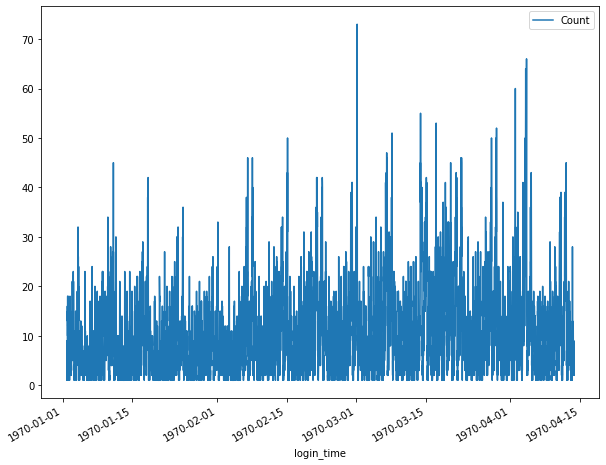

In [8]:
df.plot(figsize=(10,8));
plt.show()

We can see here that there is a trend which seems to be weekly, where we get a local peak each week. The trend also seems to be multiplicative at first but then the trend starts going lower right at the end where the peaks are as low as the beggining, so it could be additive and what we see in the middle is noisy 

## Part 2

1 - The measures of sucess is to build a predictive model of the behaviour and comapre it to the data after the experiment. Then we can check the average and any increase to see if the proposal helped. We can also check the average distance for driver partners and see the behaviour after the fact to see if it increases, which could indicate taking trips beteween the cities.

2 -

a) Build a model to predict the behaviour of the trends on the bridge, and check for changes. Also we can check the average distance before and after.

b) We can see the mean of avg distance and the mean of number of trips in a time period before and after the proposal change, and we can then see if there is a statistical significt change. 

c) If the new mean is outside of the statistical significance level we could report back the mean with the significance of the result to illustrate the reliability of the mean stated. 

##  Part 3

In [92]:
df2 = pd.read_json(r'ultimate_data_challenge.json')

In [93]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [94]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We can see here that the dataset missing values for avg_rating_of_driver, phone, and avg_rating_by_driver. We can impute the mean for the average rating, and imput unknown for the phone since it's an object. 

In [96]:
df2['avg_rating_of_driver'].fillna(value=df2['avg_rating_of_driver'].mean(),inplace=True)
df2['avg_rating_by_driver'].fillna(value=df2['avg_rating_by_driver'].mean(),inplace=True)
df2['phone'].fillna(value='Unknown',inplace=True)

In [97]:
df2["ultimate_black_user"] = df2["ultimate_black_user"].astype(int)

In [98]:
df2['active']=np.where(df2['last_trip_date'] > '2014-06-01', 1, 0)


In [124]:
df2['active'].loc[df2['active']==1].count()/df2['active'].count()

0.3662

As we can see, the percent of active customers is 36.62%, and we can also see that we replaced last_trip_date with an active column, so we don't need it anymore, furthermore we also don't need signup_date as intuittively we know it doesn't provide value here.


In [99]:
df2.drop(columns=['signup_date','last_trip_date'],inplace=True)

In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int64  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  active                  50000 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 4.2+ MB


In [101]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000
mean,2.278200,4.601559,1.074764,8.849536,0.37708,60.926084,5.796827,4.778158,0.36620
std,3.792684,0.564977,0.222336,19.958811,0.48466,37.081503,5.707357,0.445753,0.48177
min,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.00000
25%,0.000000,4.500000,1.000000,0.000000,0.00000,33.300000,2.420000,4.700000,0.00000
50%,1.000000,4.700000,1.000000,0.000000,0.00000,66.700000,3.880000,5.000000,0.00000
75%,3.000000,5.000000,1.050000,8.600000,1.00000,100.000000,6.940000,5.000000,1.00000
max,125.000000,5.000000,8.000000,100.000000,1.00000,100.000000,160.960000,5.000000,1.00000


<AxesSubplot:>

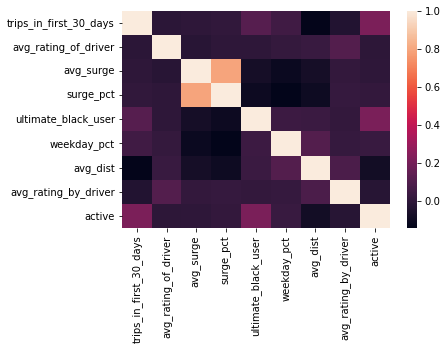

In [102]:
sns.heatmap(df2.corr())

<AxesSubplot:>

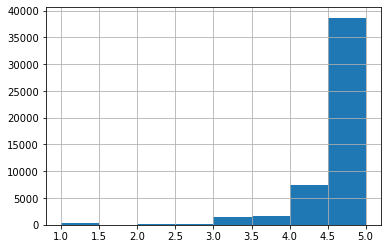

In [103]:
df2['avg_rating_of_driver'].hist(bins=8)


<AxesSubplot:>

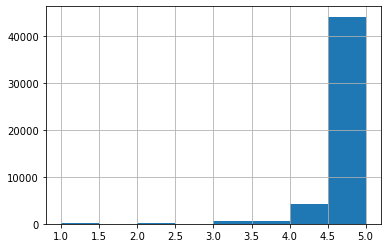

In [104]:
df2['avg_rating_by_driver'].hist(bins=8)

<AxesSubplot:xlabel='weekday_pct', ylabel='avg_surge'>

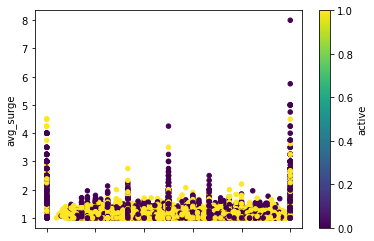

In [105]:
df2.plot.scatter(y='avg_surge',x='weekday_pct',c='active',colormap='viridis')

Now we need to standarize our numerical columns, and one hot encode our object columns

In [106]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split


In [107]:
numeric_df=df2.select_dtypes(include=np.number).drop(columns=['active'])
object_df=df2.select_dtypes(exclude=np.number)

In [108]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
names=numeric_df.columns
scaled_df = pd.DataFrame(scaled_df, columns=names) 
scaled_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,0.453984,0.174240,0.113506,0.328202,1.285285,-0.397131,-0.372650,0.497684
1,-0.600689,0.705241,-0.336268,-0.443394,-0.778038,-0.294653,0.431583,0.497684
2,0.190316,-0.533761,-0.336268,-0.443394,-0.778038,1.053741,-0.880771,0.497684
3,1.772325,-0.002760,0.293416,0.558679,1.285285,0.514383,-0.602181,0.273342
4,3.090665,-0.356760,0.518303,0.147829,-0.778038,0.579106,-0.467266,0.273342


In [109]:
dummies=pd.get_dummies(object_df)
dummies.head()

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone
0,0,1,0,0,0,1
1,1,0,0,1,0,0
2,1,0,0,0,0,1
3,0,1,0,0,0,1
4,0,0,1,1,0,0


In [110]:
pp_df=pd.concat([scaled_df,dummies,df2['active']],axis=1)
pp_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,active
0,0.453984,0.174240,0.113506,0.328202,1.285285,-0.397131,-0.372650,0.497684,0,1,0,0,0,1,1
1,-0.600689,0.705241,-0.336268,-0.443394,-0.778038,-0.294653,0.431583,0.497684,1,0,0,1,0,0,0
2,0.190316,-0.533761,-0.336268,-0.443394,-0.778038,1.053741,-0.880771,0.497684,1,0,0,0,0,1,0
3,1.772325,-0.002760,0.293416,0.558679,1.285285,0.514383,-0.602181,0.273342,0,1,0,0,0,1,1
4,3.090665,-0.356760,0.518303,0.147829,-0.778038,0.579106,-0.467266,0.273342,0,0,1,1,0,0,0


In [111]:
pp_df.shape

(50000, 15)

In [112]:
y=pp_df['active']
X=pp_df.loc[:, pp_df.columns!='active']
X.shape

(50000, 14)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.3, 
                                   shuffle=True)

In [114]:
y_train.head()

38094    0
40624    0
49425    0
35734    1
41708    1
Name: active, dtype: int64

Now that we have our data ready for machine learning, we will attempt a few machine learning algorithms to see what works best here.

In [115]:
from sklearn.metrics import accuracy_score

In [117]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)


0.7048

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)


0.7568

In [128]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)


0.7045333333333333

As we can see here, the best model here has an accuracy of 75.75%, which is a decent model considering the dataset is imbalanced. Now we need to see what are the best features that contributed to the model, and check feature importance and what the company could focus on 

In [131]:
importances = rfc.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) avg_dist                       0.289832
 2) weekday_pct                    0.134862
 3) avg_rating_by_driver           0.115880
 4) avg_rating_of_driver           0.080949
 5) trips_in_first_30_days         0.078864
 6) surge_pct                      0.077037
 7) avg_surge                      0.068383
 8) city_King's Landing            0.050080
 9) ultimate_black_user            0.033702
10) phone_iPhone                   0.020923
11) phone_Android                  0.020574
12) city_Astapor                   0.016612
13) city_Winterfell                0.011104
14) phone_Unknown                  0.001198


As we can see here, the phone has the least importance, but King's_landing has a higher importance than other cities, so a better service to the other city would be helpful. Weekday_pct and avg_dist hold the most importance, so perhaps give the less active riders longer rides to make more money and hold them as riders. And finally, the ultimate_black_user hold some importance so targeting the non black users, and offering them that for a discounted price, might keep them active. 